In [172]:
import numpy as np
import softposit as sp
from sympy import *
import matplotlib.pyplot as plt

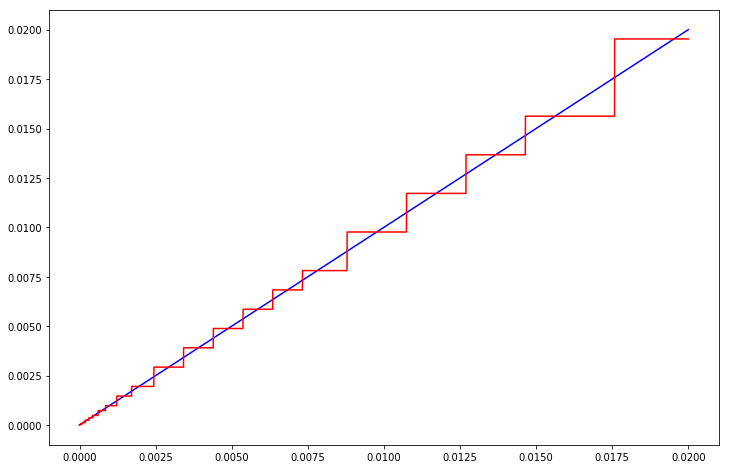

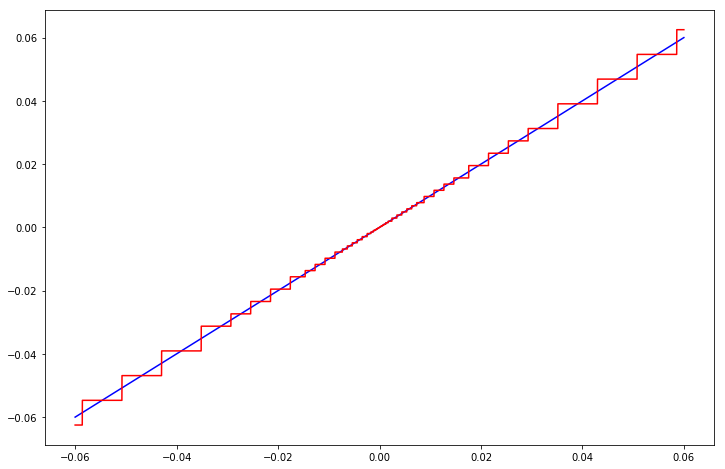

In [294]:
plt.figure(figsize=(12,8))
X = np.linspace(0,0.02, 10000)
#Y = sp.posit8()
sp.posit_2(5, 5)
plt.plot(X, X, c='blue')
Y = [sp.posit_2(x, 8) for x in X]
plt.plot(X, Y, c='r')
plt.show()
############
############
plt.figure(figsize=(12,8))
X = np.linspace(-0.06,0.06, 10000)
#Y = sp.posit8()
sp.posit_2(5, 5)
plt.plot(X, X, c='blue')
Y = [sp.posit_2(x, 8) for x in X]
plt.plot(X, Y, c='r')
plt.show()

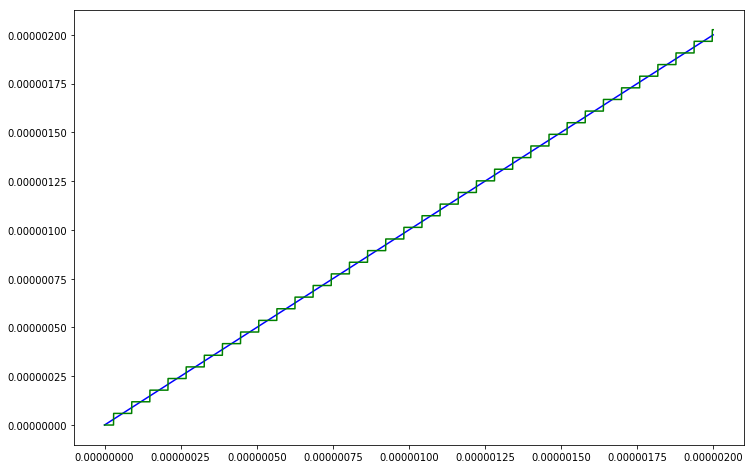

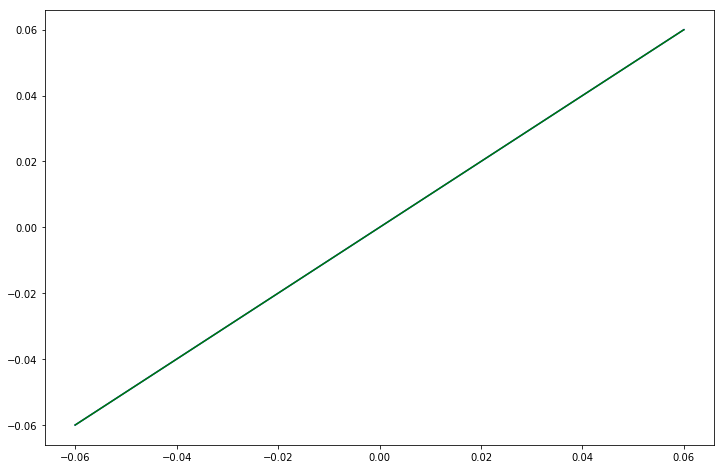

In [293]:
plt.figure(figsize=(12,8))
X = np.linspace(0,0.000002, 10000)
#Y = sp.posit8()
sp.posit_2(5, 5)
plt.plot(X, X, c='blue')
Y = np.float16(X)
plt.plot(X, Y, c='g')
plt.show()
############
############
plt.figure(figsize=(12,8))
X = np.linspace(-0.06,0.06, 10000)
#Y = sp.posit8()
sp.posit_2(5, 5)
plt.plot(X, X, c='blue')
Y = np.float16(X)
plt.plot(X, Y, c='g')
plt.show()

### Problem
Solve the system
$$\begin{pmatrix}
0.25510582 & 0.52746197\\
0.80143857 & 1.65707065
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
= 
\begin{pmatrix}
0.79981812\\
2.51270273
\end{pmatrix}$$

In [160]:
a, b, c, d = 25510582/(2**26), 52746197/(2**26), 80143857/(2**26), 165707065/(2**26)
u, v = 79981812/(2**26), 251270273/(2**26)
a

0.38013729453086853

#### Algebraic solution with `sympy` package

In [157]:
x, y = symbols('x y')
M = Matrix(((a,b,u), (c,d,v)))
system = A, b = M[:, :-1], M[:, -1]
linsolve(system, (x, y))

{(-1.0, 2.0)}

Using Cramer’s rule:

In [164]:
det = a*d - b*c;
x, y = (u*d - b*v)/det, (a*v - u*c)/det
{x,y}

{0.0, 2.0}

Whoops. While the determinate is evaluated correctly at this precision, $u d - b v$ is not, resulting in
an infinite decimal error underflow in the value for $x$. If we use 64-bit posits (es = 3), we get the
correct value (-1, 2). But posits have accuracy to spare for such a problem; we can turn the nbits
value all the way down to 59 bits and still get the correct result:

The function `sp.posit_2(value, x)` creates a posit(x, es=2) for the indicated `value`.

In [273]:
aux=sp.posit_2(333333333333333333,8)
print("Posit_2 (8 bits):", aux)
aux.toBinaryFormatted()

aux2 = sp.posit_2(514.265,16)
print("\n Posit_2 (16 bits):", aux2)
aux2.toBinaryFormatted()

Posit_2 (8 bits): 16777216.0
01111111

 Posit_2 (16 bits): 514.0
01110010 00000010


<softposit.posit128_t; proxy of <Swig Object of type 'posit128_t *' at 0x000001B10B4A50F0> >

In [313]:
pa, pb, pc, pd= sp.posit_2(25510582/(2**26), 64), sp.posit_2(52746197/(2**26), 64), sp.posit_2(80143857/(2**26), 64), sp.posit_2(165707065/(2**26), 64)
pu, pv = sp.posit_2(79981812/(2**26), 64), sp.posit_2(251270273/(2**26), 64)
#pa=sp.v = 25510582/(2**26)
#pb=sp.v = 52746197/(2**26)
#pc=sp.v = 80143857/(2**26)
#pd=sp.v = 165707065/(2**26)
#pu=sp.v = 79981812/(2**26)
#pv=sp.v = 251270273/(2**26)

px=sp.posit16(0.3)
pz=sp.posit16(0.3)
det_p = pa*pd - pb*pc;
sp.p16_div(px,pz)
# The division is not implemented!!
x, y = sp.pX2_div((pu*pd - pb*pv), det_p, 64), sp.pX2_div((pa*pv - pu*pc), det_p, 64)
{x,y}

TypeError: in method 'p16_div', argument 1 of type 'posit16_t'

In [126]:
25510582+52746197

78256779

In [125]:
pA = sp.convertDoubleToP32(25510582)
type(pA)
pB = sp.convertDoubleToP32(52746197)
sp.p32_add(pA, pB)

78256768.0

In [26]:
type(sp.posit64_t() = 25510582/(2**26))

SyntaxError: keyword can't be an expression (<ipython-input-26-958f8c44c8f4>, line 1)